In [ ]:
pip install fuzzywuzzy python-Levenshtein


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 3.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import re
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from fuzzywuzzy import process


In [ ]:
def load_data(file_path):
    return pd.read_csv(file_path)

# Load your dataset here
file_path = "/content/health_activity_data.csv"  # Replace with your own path
df = load_data(file_path)
print(df.head())
print(df.describe)
print(df.columns)

   ID  Age  Gender  Height_cm  Weight_kg    BMI  Daily_Steps  Calories_Intake  \
0   1   56    Male        164         81  30.72         5134             1796   
1   2   69    Male        156         82  20.86        12803             1650   
2   3   46  Female        158         65  30.93        16408             1756   
3   4   32    Male        197         87  31.19        18420             2359   
4   5   60    Male        157         63  29.37        17351             2556   

   Hours_of_Sleep  Heart_Rate Blood_Pressure  Exercise_Hours_per_Week Smoker  \
0             8.6         102         137/72                      8.1     No   
1             4.5         103         129/65                      3.7     No   
2             4.3          74         127/68                      3.2    Yes   
3             4.1         116         125/86                      8.5     No   
4             5.1         111         100/64                      8.5    Yes   

   Alcohol_Consumption_per_Week 

In [ ]:
def determine_task_type(df):
    target_column = df.columns[-1]
    unique_vals = df[target_column].nunique()

    if df[target_column].dtype == 'object' or unique_vals <= 10:
        print(f"\nDetected Task: Classification\nTarget Column: '{target_column}' with {unique_vals} unique values\n")
        return "classification", target_column
    else:
        print(f"\nDetected Task: Regression (Target Column: '{target_column}' with {unique_vals} unique values)")
        print("Exiting... This pipeline only supports classification tasks.\n")
        sys.exit()

task_type, target_column = determine_task_type(df)



Detected Task: Classification
Target Column: 'Heart_Disease' with 2 unique values



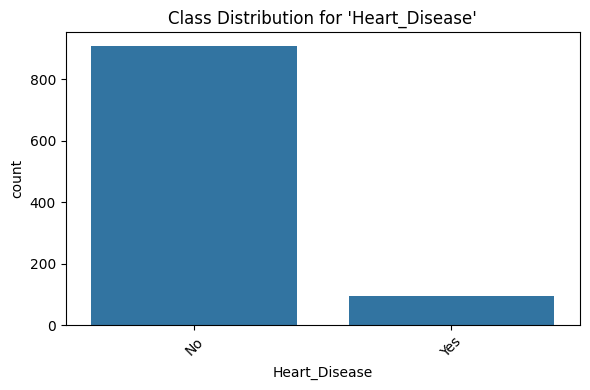

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x=target_column)
plt.title(f"Class Distribution for '{target_column}'")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
def normalize_labels(y):
    y_clean = y.astype(str).str.lower().str.strip()
    unique_labels = y_clean.unique()
    canonical_labels = {}

    for label in unique_labels:
        match, score = process.extractOne(label, list(canonical_labels.keys())) if canonical_labels else (None, 0)
        if score >= 85:
            canonical_labels[label] = canonical_labels[match]
        else:
            canonical_labels[label] = label

    return y_clean.map(canonical_labels)


In [ ]:
def clean_numeric_columns(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].astype(str).apply(lambda x: re.findall(r"[-+]?\d*\.\d+|\d+", x))
            df[col] = df[col].apply(lambda x: float(x[0]) if x else np.nan)
    return df


In [ ]:
def preprocess_data(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]

    y = normalize_labels(y)
    X = clean_numeric_columns(X)
    X = X.dropna(axis=1, how='all')
    X = X.fillna(X.mean(numeric_only=True))
    X = pd.get_dummies(X, drop_first=True)

    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

    if y.dtype == 'object':
        le = LabelEncoder()
        y = le.fit_transform(y)

    return X, y

X, y = preprocess_data(df, target_column)


Logistic Regression: Accuracy = 0.9300
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       186
           1       0.00      0.00      0.00        14

    accuracy                           0.93       200
   macro avg       0.47      0.50      0.48       200
weighted avg       0.86      0.93      0.90       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


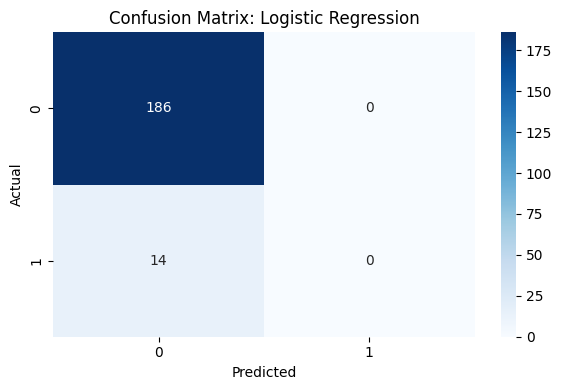

Random Forest: Accuracy = 0.9300
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       186
           1       0.00      0.00      0.00        14

    accuracy                           0.93       200
   macro avg       0.47      0.50      0.48       200
weighted avg       0.86      0.93      0.90       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


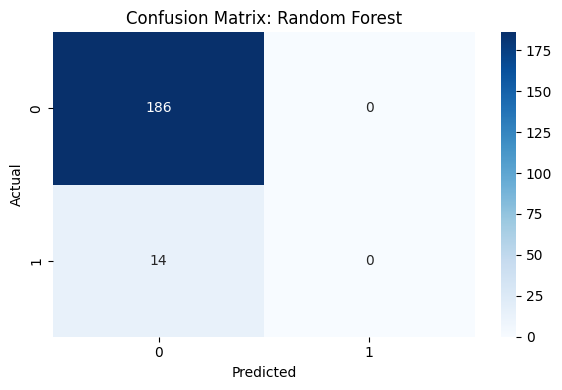

Support Vector Machine: Accuracy = 0.9300
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       186
           1       0.00      0.00      0.00        14

    accuracy                           0.93       200
   macro avg       0.47      0.50      0.48       200
weighted avg       0.86      0.93      0.90       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


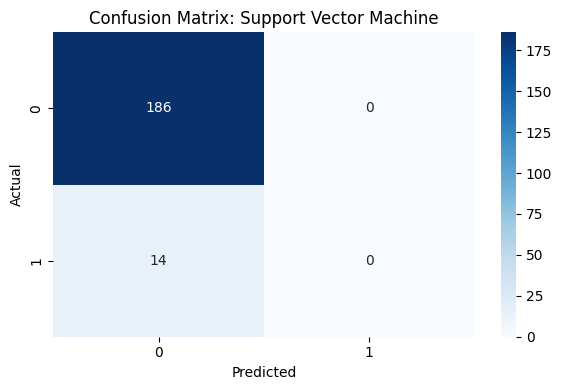

Naive Bayes: Accuracy = 0.9300
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       186
           1       0.00      0.00      0.00        14

    accuracy                           0.93       200
   macro avg       0.47      0.50      0.48       200
weighted avg       0.86      0.93      0.90       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


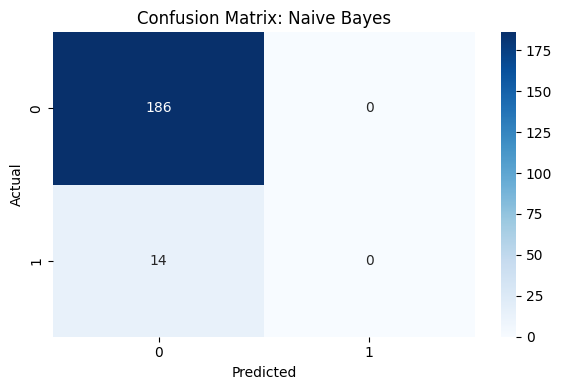

K-Nearest Neighbors: Accuracy = 0.9250
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       186
           1       0.00      0.00      0.00        14

    accuracy                           0.93       200
   macro avg       0.46      0.50      0.48       200
weighted avg       0.86      0.93      0.89       200



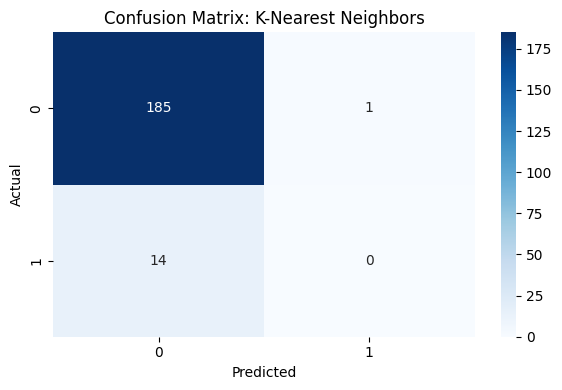

Decision Tree: Accuracy = 0.8250
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       186
           1       0.04      0.07      0.05        14

    accuracy                           0.82       200
   macro avg       0.49      0.48      0.48       200
weighted avg       0.86      0.82      0.84       200



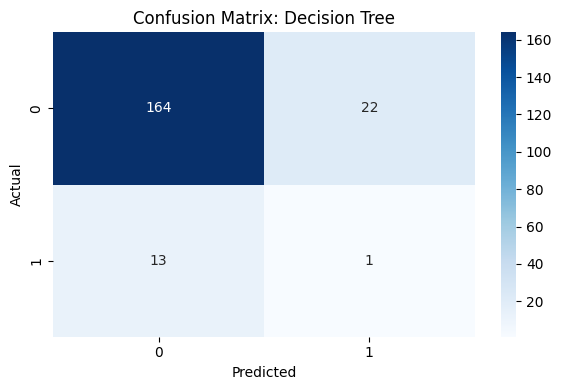

Gradient Boosting: Accuracy = 0.9150
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       186
           1       0.00      0.00      0.00        14

    accuracy                           0.92       200
   macro avg       0.46      0.49      0.48       200
weighted avg       0.86      0.92      0.89       200



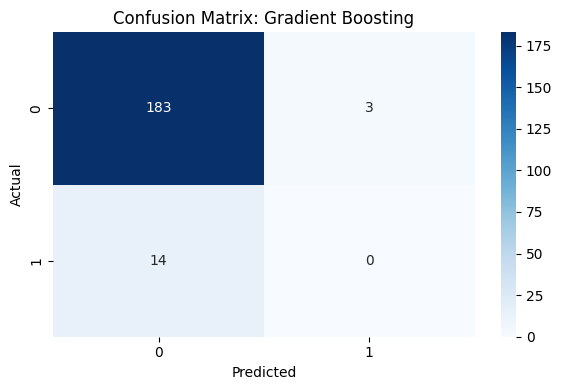

AdaBoost: Accuracy = 0.9300
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       186
           1       0.00      0.00      0.00        14

    accuracy                           0.93       200
   macro avg       0.47      0.50      0.48       200
weighted avg       0.86      0.93      0.90       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


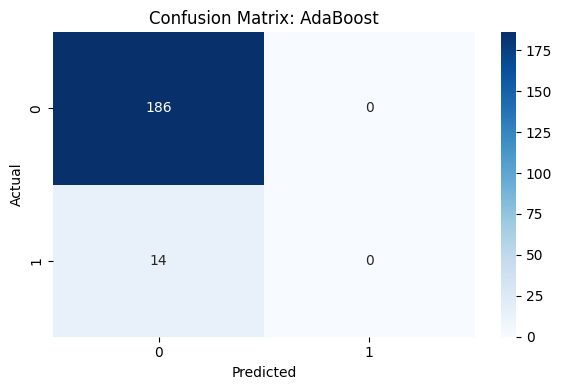


Best Performing Model: Logistic Regression with Accuracy = 0.9300



In [ ]:
def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {
        "Logistic Regression": LogisticRegression(max_iter=300),
        "Random Forest": RandomForestClassifier(),
        "Support Vector Machine": SVC(),
        "Naive Bayes": GaussianNB(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "AdaBoost": AdaBoostClassifier()
    }

    best_model = None
    best_accuracy = 0

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"{name}: Accuracy = {acc:.4f}")
        print(classification_report(y_test, y_pred))

        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix: {name}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.tight_layout()
        plt.show()

        if acc > best_accuracy:
            best_accuracy = acc
            best_model = name

    print(f"\nBest Performing Model: {best_model} with Accuracy = {best_accuracy:.4f}\n")

train_and_evaluate(X, y)


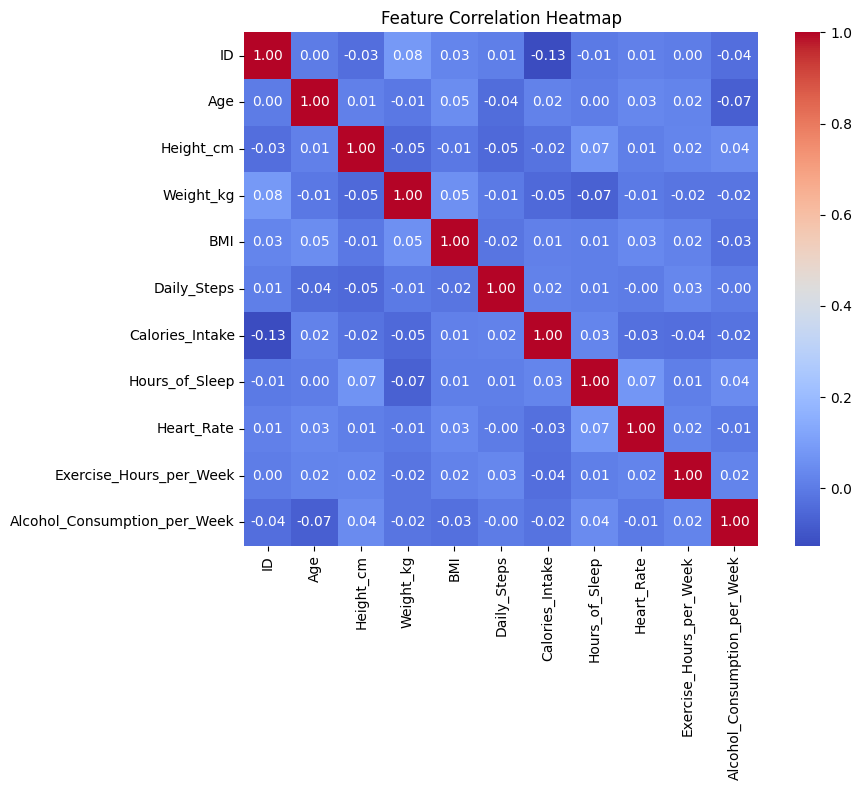

In [ ]:
# Correlation heatmap (only for numeric features)
def plot_correlation_heatmap(df):
    numeric_df = df.select_dtypes(include=[np.number])
    if not numeric_df.empty:
        plt.figure(figsize=(10, 8))
        sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
        plt.title("Feature Correlation Heatmap")
        plt.tight_layout()
        plt.show()

plot_correlation_heatmap(df.drop(columns=[target_column]))  # Drop target for correlation


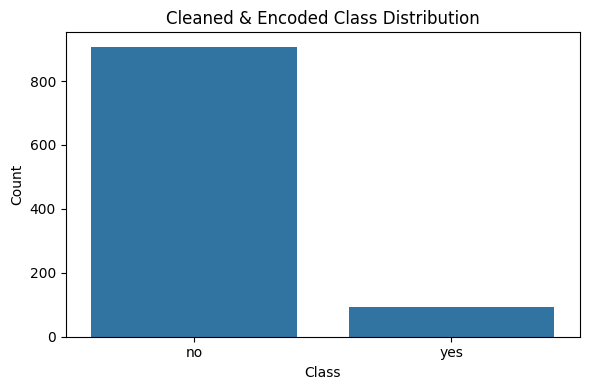

In [ ]:
# Visualize class distribution after normalization
def plot_cleaned_class_distribution(y):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=y)
    plt.title("Cleaned & Encoded Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

plot_cleaned_class_distribution(normalize_labels(df[target_column]))


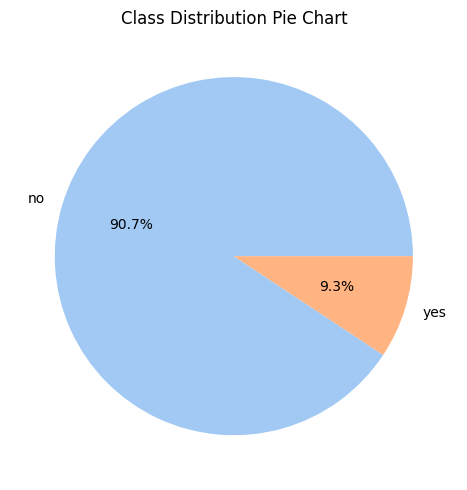

In [ ]:
# Pie chart for class balance
def plot_class_balance_pie(y):
    class_counts = pd.Series(y).value_counts()
    plt.figure(figsize=(5, 5))
    plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
    plt.title("Class Distribution Pie Chart")
    plt.tight_layout()
    plt.show()

plot_class_balance_pie(normalize_labels(df[target_column]))


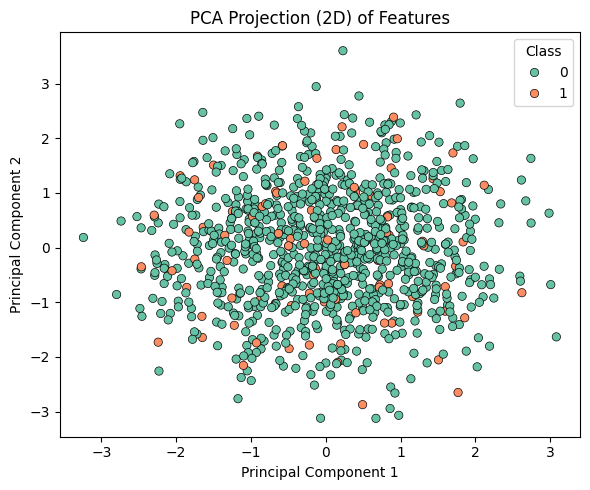

In [ ]:
from sklearn.decomposition import PCA

def plot_pca(X, y):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set2', edgecolor='k')
    plt.title("PCA Projection (2D) of Features")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title='Class')
    plt.tight_layout()
    plt.show()

plot_pca(X, y)


<ipython-input-81-4e03a3bed44b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance[sorted_idx], y=X.columns[sorted_idx], palette='viridis')


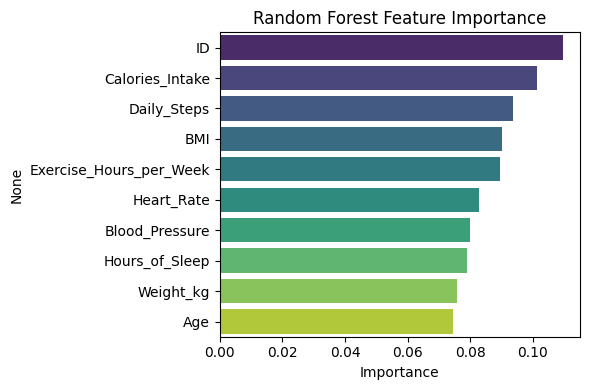

In [ ]:
def plot_feature_importance(model, X, title):
    if hasattr(model, "feature_importances_"):
        importance = model.feature_importances_
        sorted_idx = np.argsort(importance)[::-1][:10]  # Top 10
        plt.figure(figsize=(6, 4))
        sns.barplot(x=importance[sorted_idx], y=X.columns[sorted_idx], palette='viridis')
        plt.title(title)
        plt.xlabel("Importance")
        plt.tight_layout()
        plt.show()

# Use after training the model:
tree_model = RandomForestClassifier().fit(X, y)
plot_feature_importance(tree_model, X, "Random Forest Feature Importance")


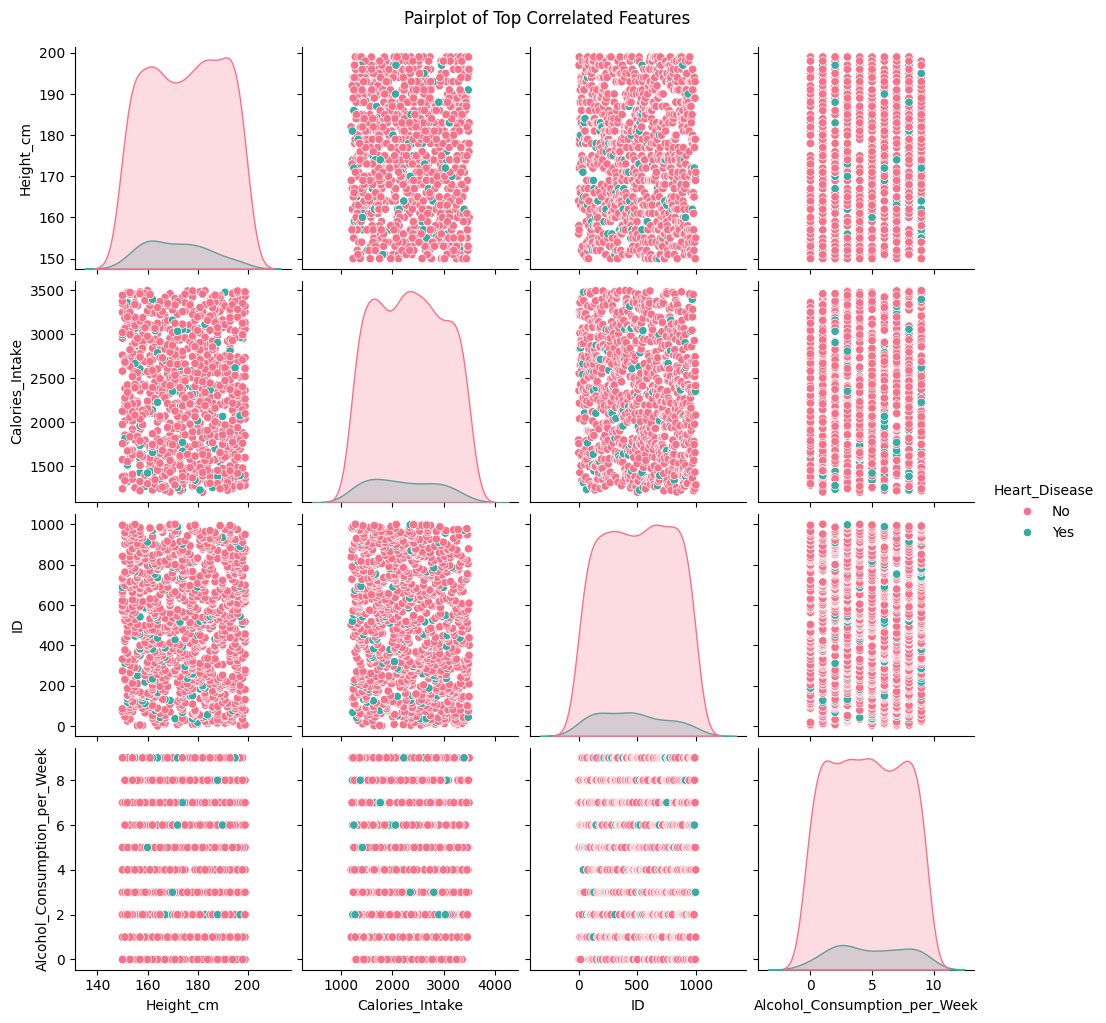

In [ ]:
# Top correlated features pairplot (before scaling to preserve distribution)
def plot_pairplot(df, target_column):
    numeric_df = df.select_dtypes(include=np.number)
    top_features = numeric_df.corrwith(df[target_column].astype('category').cat.codes).abs().nlargest(4).index.tolist()
    sns.pairplot(df[top_features + [target_column]], hue=target_column, palette='husl')
    plt.suptitle("Pairplot of Top Correlated Features", y=1.02)
    plt.show()

# Use on original (non-scaled) data
plot_pairplot(df.copy(), target_column)


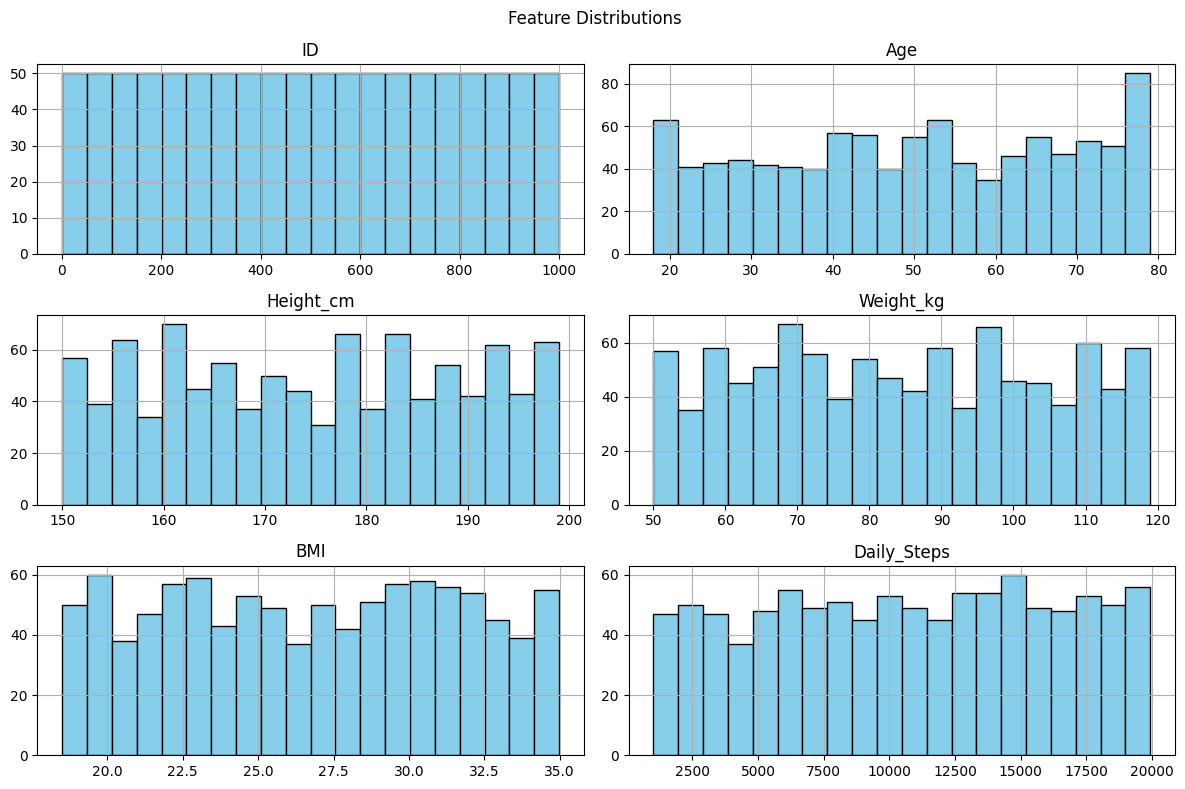

In [ ]:
# Distribution of top numeric features
def plot_feature_distributions(df):
    numeric_cols = df.select_dtypes(include=np.number).columns[:6]  # Limit to first 6 features
    df[numeric_cols].hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
    plt.suptitle("Feature Distributions")
    plt.tight_layout()
    plt.show()

plot_feature_distributions(df.drop(columns=[target_column]))


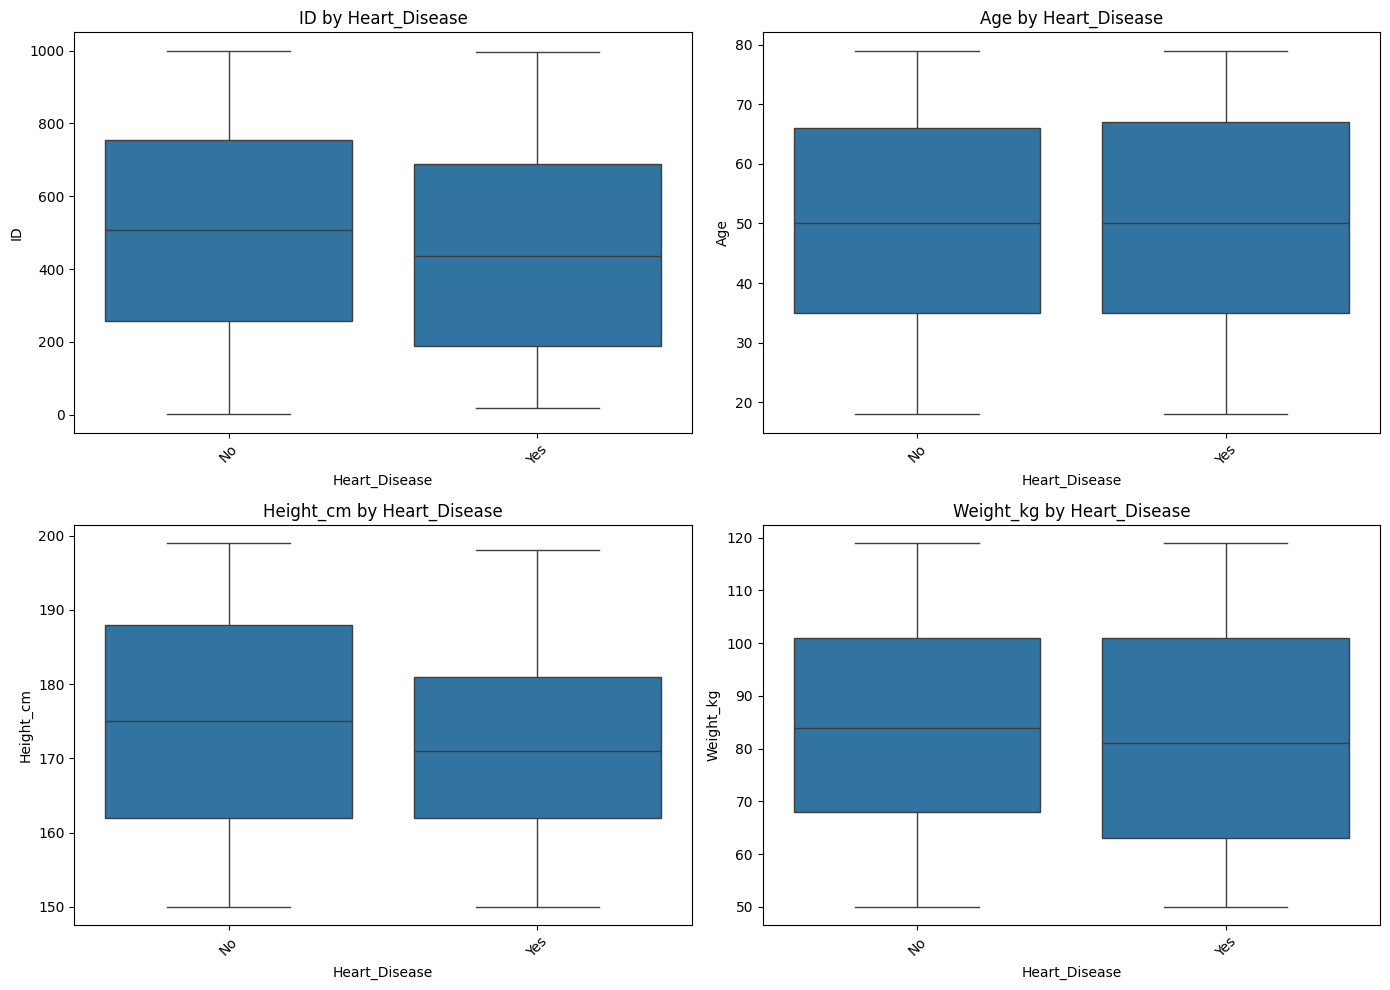

In [ ]:
# Boxplots of numeric features vs target
def plot_boxplots(df, target_column):
    numeric_cols = df.select_dtypes(include=np.number).columns[:4]  # Limit to 4
    plt.figure(figsize=(14, 10))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(2, 2, i)
        sns.boxplot(x=target_column, y=col, data=df)
        plt.title(f"{col} by {target_column}")
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_boxplots(df, target_column)
